# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Country-data.csv", sep = ",")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [7]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 3, random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

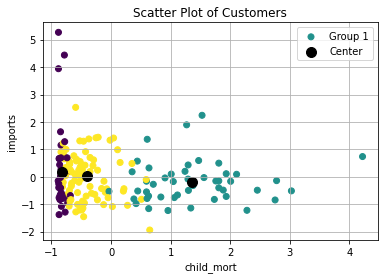

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [21]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random')
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

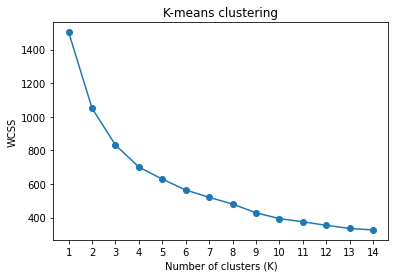

In [22]:
# Visualize the results
fig, ax = plt.subplots()
ax.plot(Ks, WCSSs, marker='o')
ax.set_xticks(Ks)
ax.set_xlabel('Number of clusters (K)')
ax.set_ylabel('WCSS')
ax.set_title('K-means clustering')
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

I would choose k = 10, because after 10, the WCSS values start to level off.

In [23]:
kmeans = KMeans(n_clusters = 10, n_init = 30, init = 'random').fit(X_scaled)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [45]:
pred = kmeans.predict(X_scaled)
pred = pd.DataFrame(pred, columns=['Pred'])

In [46]:
clusters = pd.concat([names, pred], axis = 1)
clusters.head()

,country,Pred
0,Afghanistan,7
1,Albania,1
2,Algeria,6
3,Angola,7
4,Antigua and Barbuda,4


In [53]:
clusters['Pred'].max()

9

In [54]:
clusters['Pred'].min()

0

In [57]:
list(clusters[clusters['Pred'] == 0]["country"])

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Italy',
 'Japan',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States']

In [58]:
list(clusters[clusters['Pred'] == 1]["country"])

['Albania',
 'Bahamas',
 'Barbados',
 'Bosnia and Herzegovina',
 'Brazil',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Ecuador',
 'El Salvador',
 'Georgia',
 'Israel',
 'Lebanon',
 'Macedonia, FYR',
 'Moldova',
 'Montenegro',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovenia',
 'South Korea',
 'Turkey',
 'Ukraine',
 'Uruguay']

In [59]:
list(clusters[clusters['Pred'] == 2]["country"])

['Ireland', 'Luxembourg', 'Malta', 'Singapore']

In [60]:
list(clusters[clusters['Pred'] == 3]["country"])

['Comoros',
 'Congo, Rep.',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Iraq',
 'Kenya',
 'Lao',
 'Madagascar',
 'Mauritania',
 'Pakistan',
 'Senegal',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Yemen']

In [61]:
list(clusters[clusters['Pred'] == 4]["country"])

['Antigua and Barbuda',
 'Bahrain',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bulgaria',
 'Cambodia',
 'Czech Republic',
 'Estonia',
 'Fiji',
 'Guyana',
 'Hungary',
 'Jordan',
 'Kyrgyz Republic',
 'Latvia',
 'Libya',
 'Lithuania',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Panama',
 'Paraguay',
 'Seychelles',
 'Slovak Republic',
 'Thailand',
 'Tunisia',
 'Turkmenistan',
 'Vietnam']

In [62]:
list(clusters[clusters['Pred'] == 5]["country"])

['Mongolia', 'Nigeria', 'Venezuela']

In [63]:
list(clusters[clusters['Pred'] == 6]["country"])

['Algeria',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Bolivia',
 'Cape Verde',
 'China',
 'Dominican Republic',
 'Egypt',
 'Grenada',
 'Guatemala',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Kazakhstan',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Peru',
 'Philippines',
 'Russia',
 'Samoa',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Tonga',
 'Uzbekistan',
 'Vanuatu']

In [64]:
list(clusters[clusters['Pred'] == 7]["country"])

['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Congo, Dem. Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Malawi',
 'Mali',
 'Mozambique',
 'Niger',
 'Uganda',
 'Zambia']

In [65]:
list(clusters[clusters['Pred'] == 8]["country"])

['Botswana',
 'Burundi',
 'Kiribati',
 'Lesotho',
 'Liberia',
 'Micronesia, Fed. Sts.',
 'Namibia',
 'Rwanda',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Togo']

In [66]:
list(clusters[clusters['Pred'] == 9]["country"])

['Brunei', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']

I notice that countries in a cluster usually have something in common in the reality. For example, some countries are geographically close, such as Oman, Qatar, Saudi Arabia, United Arab Emirates in cluster whose pred is 9. Moreover, some countries in one cluster have similar economic level, for example, cluster whose pred is 0 and 2.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [67]:
df = pd.concat([X, pred], axis = 1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Pred
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,7
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,6
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,7
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4


In [68]:
df.groupby('Pred').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Pred,,,,,,,,,
0,4.305000,38.445000,10.699500,36.145000,41180.000000,1.575500,80.945000,1.759000,47140.000000
1,11.322222,34.707407,8.293333,43.900000,16657.777778,4.113815,76.440741,1.757037,11788.148148
2,4.150000,157.750000,7.392500,139.125000,59450.000000,1.046000,81.175000,1.547500,55350.000000
3,70.000000,29.270000,4.961176,36.858824,4132.941176,12.997059,64.405882,4.714706,1880.294118
4,18.457143,63.007143,5.898929,65.575000,15371.071429,4.310464,73.332143,2.161429,8038.428571
5,57.733333,33.500000,5.140000,30.566667,9786.666667,63.033333,67.366667,3.650000,6160.000000
6,29.648387,27.628677,4.974516,34.973094,8964.193548,9.396484,71.258065,2.610968,4164.709677
7,117.252632,30.394737,5.777895,40.594737,3514.157895,9.300789,55.389474,5.648421,1714.157895
8,74.125000,28.543333,10.318333,61.341667,4019.500000,6.155833,58.425000,4.147500,2303.166667


# Q7.) Write an observation about the descriptive statistics.

(1) Countries in cluster 0 and 2 enjoy the highest level of gdpp and income, however their child_mort and total_fer is also the lowest among the 9 cluster. On contrary, clusters at low income level have high child_mort and total_fer;

(2)The relationship between exports, health and imports and gdpp is quite positive;

(3)Comparatively, the relationship between inflation and gdpp is not quite obvious.